## Ridge

In [1]:
### numpy版本为1.20.3
import numpy as np
import pandas as pd

In [2]:
data = np.genfromtxt('example.dat', delimiter=',')
# 选择特征与标签
x = data[:,0:100] 
y = data[:,100].reshape(-1,1)
# 加一列
X = np.column_stack((np.ones((x.shape[0],1)),x))

# 划分训练集与测试集
X_train, y_train = X[:70], y[:70]
X_test, y_test = X[70:], y[70:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(70, 101) (70, 1) (31, 101) (31, 1)


In [3]:
# 定义参数初始化函数
def initialize(dims):
    w = np.zeros((dims, 1))
    b = 0
    return w, b

In [4]:
# 定义ridge损失函数
def l2_loss(X, y, w, b, alpha):
    num_train = X.shape[0]
    num_feature = X.shape[1]
    y_hat = np.dot(X, w) + b
    loss = np.sum((y_hat-y)**2)/num_train + alpha*(np.sum(np.square(w)))
    dw = np.dot(X.T, (y_hat-y)) /num_train + 2*alpha*w
    db = np.sum((y_hat-y)) /num_train
    return y_hat, loss, dw, db

In [5]:
# 定义训练过程
def ridge_train(X, y, learning_rate=0.01, epochs=300):
    loss_list = []
    w, b = initialize(X.shape[1])
    for i in range(1, epochs):
        y_hat, loss, dw, db = l2_loss(X, y, w, b, 0.1)
        w += -learning_rate * dw
        b += -learning_rate * db
        loss_list.append(loss)
        
        if i % 100 == 0:
            print('epoch %d loss %f' % (i, loss))
        params = {
            'w': w,
            'b': b
        }
        grads = {
            'dw': dw,
            'db': db
        }
    return loss, loss_list, params, grads

In [21]:
# 执行训练示例
loss, loss_list, params, grads = ridge_train(X_train, y_train, 0.01, 1000)

epoch 100 loss 1.272892
epoch 200 loss 0.918566
epoch 300 loss 0.824857
epoch 400 loss 0.786619
epoch 500 loss 0.767618
epoch 600 loss 0.757040
epoch 700 loss 0.750696
epoch 800 loss 0.746687
epoch 900 loss 0.744053


In [22]:
# 获取训练参数
params

{'w': array([[-0.04196546],
        [-0.10129988],
        [ 0.39150459],
        [ 0.27116379],
        [ 0.14453605],
        [ 0.64205522],
        [-0.11777636],
        [ 0.63100371],
        [-0.24612371],
        [-0.01809963],
        [-0.0098817 ],
        [ 0.59860774],
        [ 0.05109339],
        [ 0.57323775],
        [ 0.0717013 ],
        [-0.2494207 ],
        [ 0.05841939],
        [ 0.34882372],
        [-0.05196151],
        [ 0.59741259],
        [ 0.07360193],
        [-0.00804983],
        [-0.08417487],
        [ 0.38967928],
        [-0.02238394],
        [-0.05105738],
        [-0.04475576],
        [-0.04810095],
        [-0.05424062],
        [ 0.36298941],
        [ 0.09421072],
        [ 0.12947524],
        [ 0.12975187],
        [ 0.13770473],
        [-0.11610581],
        [-0.03832583],
        [ 0.07592514],
        [-0.05664576],
        [-0.01481198],
        [-0.13093971],
        [-0.03888878],
        [ 0.04806379],
        [ 0.07572836],
      

In [23]:
# 定义预测函数
def predict(X, params):
    w = params['w']
    b = params['b']
    
    y_pred = np.dot(X, w) + b
    return y_pred

y_pred = predict(X_test, params)
y_pred[:5]

array([[-0.07363409],
       [-2.23904964],
       [ 1.35392332],
       [-2.21912506],
       [-2.56515114]])

In [25]:
y_test[:5]

array([[ 0.24671],
       [-4.25711],
       [ 2.38642],
       [-1.87815],
       [-3.41362]])

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.37904012691697686

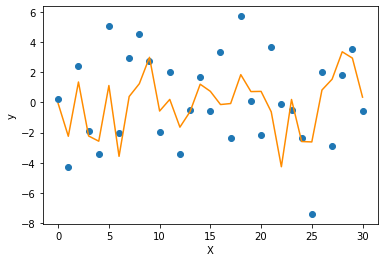

In [27]:
# 简单绘图
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.show();

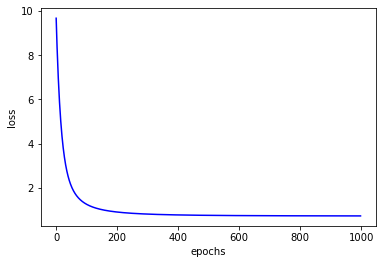

In [28]:
# 训练过程中的损失下降
plt.plot(loss_list, color = 'blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [29]:
# 导入线性模型模块
from sklearn.linear_model import Ridge
# 创建Ridge模型实例
clf = Ridge(alpha=1.0)
# 对训练集进行拟合
clf.fit(X_train, y_train)
# 打印模型相关系数
print("sklearn Ridge intercept :", clf.intercept_)
print("\nsklearn Ridge coefficients :\n", clf.coef_)

sklearn Ridge intercept : [-0.40576153]

sklearn Ridge coefficients :
 [[ 0.00000000e+00 -2.01786172e-01  5.45135248e-01  3.28370796e-01
   7.88208577e-02  8.63329630e-01 -1.28629181e-01  8.98548367e-01
  -4.15384520e-01  1.58905870e-01 -2.93807956e-02  6.32380717e-01
   4.21771945e-02  9.24308741e-01  1.20277300e-01 -3.85333806e-01
   1.63068579e-01  3.98963430e-01 -2.55902692e-02  8.88008417e-01
   3.69510302e-02  5.63702626e-04 -1.74758205e-01  4.51826721e-01
  -7.30107159e-02 -1.35017481e-01  5.39686001e-02 -4.02425081e-03
  -6.07507156e-02  3.75631827e-01  8.57162815e-02  1.45771573e-01
   1.44022204e-01  1.98972072e-01 -1.74729670e-01 -4.55411141e-02
   2.10931708e-01 -4.20589474e-02 -1.16955409e-01 -3.48704701e-01
   9.24987738e-02 -3.59919666e-02  3.12791851e-02  9.89341477e-02
  -3.20373964e-02  5.01884867e-04  2.52601261e-02 -1.43870413e-01
  -2.01630343e-01 -2.04659068e-02  1.39960583e-01 -2.40332862e-01
   1.64551174e-01  1.05411007e-02 -1.27446721e-01 -8.05713152e-02
   3.

In [30]:
y_pred_rg = clf.predict(X_test)
r2_score(y_test, y_pred_rg)

0.3131614134496792